In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## In machine learning, there are traditionally two main types of modelling approaches:
## - Supervised and Un-Supervised.
- In this project we are going to use Supervised learning (data has label)
- Classification - predict a category value i.e. is fraud yes/no. That means it is a binary (yes/no) classification
## Fraud detection is typically a supervised, binary classification problem, but unsupervised learning (clustering) can be used

In [5]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

## Partition data into a dataset:

- that can be used for training of the model and
- a secondary set that can be used to evaluate the effectiveness of the model after training

In [6]:
y = df['Class']
X = df.drop(['Class', 'Amount', 'Time'], axis=1)

## Model vadiation

- Train set which our model learns from
- Test set which is used to evaluate the effectiveness of the model after training is complete
- Often a 80/20 or 90/10 split depending on the amount of data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (256326, 28)
X_test: (28481, 28)
y_train: (256326,)
y_test: (28481,)


In [8]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
169217,-0.204054,0.773672,-0.508138,-0.504530,1.110237,-0.889531,0.892855,-0.129737,0.067865,-0.706473,...,-0.157602,-0.045248,-0.354026,-0.841090,0.345082,0.463542,-0.357763,0.117770,0.124158,0.049966
127577,1.185899,-0.777605,0.290538,-0.507296,-0.883708,-0.444648,-0.380721,-0.136399,-0.734164,0.441292,...,0.425192,0.249048,0.100304,0.176216,-0.087076,0.117514,0.455406,-0.235654,0.009948,0.026970
155900,0.337897,-0.400062,1.397225,-0.601374,-1.432251,-0.115443,-0.791959,-0.113610,-0.818184,1.161987,...,2.266210,-0.067891,-0.200381,0.177004,0.015208,-0.096025,-0.729801,0.219861,0.203869,0.166661
274954,2.035125,-0.389804,-2.551903,-0.722794,2.380486,3.320923,-0.468416,0.789462,0.402422,0.089469,...,0.020289,-0.138523,-0.288467,-0.839066,0.374619,0.698594,-0.267765,0.218413,-0.053658,-0.065533
250973,1.994644,-0.343013,-0.516240,0.339995,-0.353679,-0.100897,-0.572387,-0.009577,1.255657,-0.167218,...,-0.344320,-0.140784,0.280918,1.054895,0.089021,0.657755,0.014361,-0.165380,0.039714,-0.031416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85418,-1.497933,0.657921,1.581568,-0.024286,0.584698,1.303031,0.609212,0.135561,0.452745,0.108640,...,-1.241768,-0.225079,-0.072452,0.299172,0.110048,-0.615980,-0.425883,0.263968,-0.448445,0.045178
29062,1.069777,0.072105,0.496540,1.505318,-0.380277,-0.370243,0.100551,-0.026687,0.319684,-0.131553,...,-0.500426,-0.149402,-0.061991,-0.044629,-0.050485,0.400171,0.593314,-0.335160,0.031014,0.024886
13766,1.280465,0.300586,0.333044,0.512720,0.065052,-0.145844,-0.145519,-0.091833,1.111187,-0.268878,...,0.278512,-0.093783,-0.409934,-0.961351,0.033153,-0.560429,0.278428,0.089546,-0.059835,-0.005887
17677,-0.598120,0.775041,1.823394,0.312991,-0.096171,-0.391452,0.499351,0.071224,-0.017496,-0.512312,...,-0.238137,0.102259,0.060615,0.568083,-0.084001,0.685003,-0.245859,0.356638,0.378580,0.206366


## We can use numpy to view the number of positive classes within our sample data set

In [9]:
print("Fraud in y_train:", len(np.where(y_train == 1)[0]))
print("Fraud in y_test:", len(np.where(y_test == 1)[0]))

Fraud in y_train: 443
Fraud in y_test: 49


## Confusion Matrix
- Acts as a cross section between the ground truth and the predictions that the trained model makes
- In a binary classification context, the confusion matrix reports on the classification performance of the model:
    - True negative - actually non-fraudulent correctly classified as non-fraudulent
    - False positive - actually non-fraudulent but incorrectly classified as fraud
    - False negative - actually fraud but incorrectly classified as being non-fraudulent
    - True positive - actually fraud and correctly classified as fraud
- We're trying to detect fraud, so the "positive" relates to fraud while "negative" refers to non-fraudulent.
- "True" relates to correct predictions, whereas "false" refers to incorrect predictions.
- Many performance metrics are derived from the elements of the confusion matrix, therefore it is foundational for understanding how to measure performance for classification problems.

In [10]:
# XGBoost is a popular and efficient open-source implementation of the gradient boosted trees algorithm.
# Gradient boosting is a supervised learning algorith, with attempts to accurately predict a target
# variable by combining the testimates of a set of simpler, weaker models.
# installing xgboost in wondows machine: %pip install xgboost the press ctrl + enter on the keyboard

# continue improving XGBoost now introduce the max_depth=5
# max_depth specifies the maximum depth to which each tree will be built.
# reduces overfitting

model_xgb = xgb.XGBClassifier(max_depth=5, scale_pos_weight=100)

model_xgb.fit(X_train, y_train)

y_pred = model_xgb.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[28426,     6],
       [    9,    40]], dtype=int64)

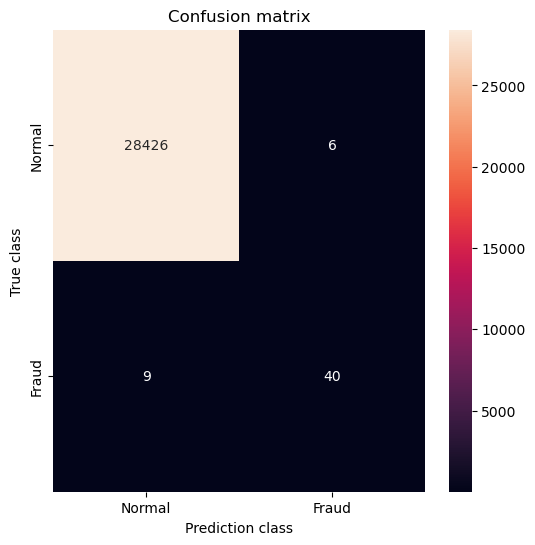

In [11]:
LABELS = ["Normal", "Fraud"]

conf_matrix_xgb = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_xgb, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Prediction class')
plt.show()

## Understanding the Cost of Misclassification

In [12]:
# slice the confusion matrix results as an python object
print(conf_matrix_xgb[0][0])
print(conf_matrix_xgb[0][1])
print(conf_matrix_xgb[1][0])
print(conf_matrix_xgb[1][1])

28426
6
9
40


In [13]:
# costs defaults

cost_tn = 1
cost_fp = 10
cost_fn = 100
cost_tp = 1

## Workout Total Cost of Fraud - Overall for the Model

- take each of the classifications from the matrix boxes that we have sliced to python object.
- apply the hard coded costing for each number of the classification and apply cost per each relative hard coded cost

In [14]:
total_cost_of_fraud_xgb = (conf_matrix_xgb[0][0] * cost_tn) + (conf_matrix_xgb[0][1] * cost_fp) + (conf_matrix_xgb[1][0] * cost_fn) + (conf_matrix_xgb[1][1] * cost_tp)
total_cost_of_fraud_xgb

29426

## Performance Metrics for Fraud Detection¶

- Implementing Performance Metrics in scikit-learn

In [15]:
confusion_matrix(y_test, y_pred) # print out a confusion matrix from XGBoot trained model because it is an optimal solution

array([[28426,     6],
       [    9,    40]], dtype=int64)

In [16]:
from sklearn.metrics import (classification_report, precision_score, recall_score,
                            average_precision_score, roc_auc_score,
                            f1_score, matthews_corrcoef)

In [17]:
# Precision is the propotion of correctly predicted fraudulent instances among all instances predicted as fraud
# TP / (TP + FP)
# e.g. 40 / 40 + 6

precision_score(y_test, y_pred)

0.8695652173913043

In [18]:
# Recall is the proportion of the fradulent instances that are successfully predicted
# TP / (TP + FN)
# e.g. 40 / 40 + 9

recall_score(y_test, y_pred)

0.8163265306122449

In [19]:
# F1_score is the harmonic balance of precision and recall (can be weighted score towards P or R if need be)
# F = 2 * (Precision * Recall) / (Precision * Recall)
# F = 2 * (0.869 * 0.816) / (0.869 * 0.816)

f1_score(y_test, y_pred)

0.8421052631578948

In [20]:
# AUROC / AUC = Area under the Reciever Operating Characteristics curve
# plot the TPR (Recall) and FPR at various classification threshold
# FPR = FP / FP + TN
# Good measure of overall performance of the model

roc_auc_score(y_test, y_pred)

0.9080577503933481

In [21]:
# AUPROC = Area under the Precision-Recal curve
# Better alternative to AUC as does include TN which influences the score significantly in high imbalanced data
# calaculates the area under the curve at varioud classifications thresholds

average_precision_score(y_test, y_pred)

0.7101651571945705

In [22]:
# Classification report summarizes the classification metrics at the class and overall level
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.87      0.82      0.84        49

    accuracy                           1.00     28481
   macro avg       0.93      0.91      0.92     28481
weighted avg       1.00      1.00      1.00     28481



## Threshold Optimization using Total Cost of Fraud

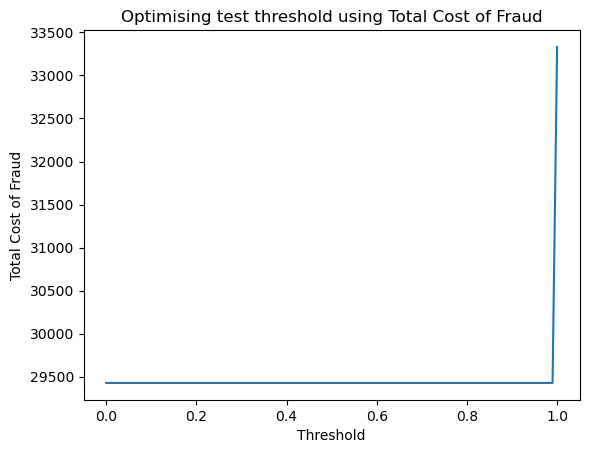

In [23]:
import numpy as np
from sklearn.metrics import average_precision_score

threshold_list = []
tcf_list = []
cost_tn = 1
cost_fp = 10
cost_fn = 100
cost_tp = 1
thresholds = np.linspace(0, 1, 100)

for threshold in thresholds:
    y_pred_thresh = [1 if e > threshold else 0 for e in y_pred]
    threshold_list.append(threshold)
    
    # Total Cost of Fraud
    conf_matrix_xgb = confusion_matrix(y_test, y_pred_thresh)
    tcf_score = (conf_matrix_xgb[0][0] * cost_tn) + (conf_matrix_xgb[0][1] * cost_fp) + (conf_matrix_xgb[1][0] * cost_fn) + (conf_matrix_xgb[1][1] * cost_tp)
    tcf_list.append(tcf_score)
    
# plot curve
threshold_df = pd.DataFrame(threshold_list, tcf_list).reset_index()
threshold_df.columns = ['TCF', 'Threshold']
    
plt.plot(threshold_df['Threshold'], threshold_df['TCF'])
plt.title("Optimising test threshold using Total Cost of Fraud")
plt.xlabel('Threshold')
plt.ylabel('Total Cost of Fraud')
plt.savefig('Optimising threshold using Total Cost of Fraud');
plt.show()

In [24]:
# if threshold = 0, then everything is fraud (lots of false positives which cost R10 each)
# if threshold = 1, then everything is non-fraudulent (quite a few missed cases of fraud which cost R100 each)
# optimal threshold for this model is around 70% (already well balanced)

threshold_df.sort_values(by='TCF', ascending=True)

,TCF,Threshold
0,29426,0.000000
72,29426,0.727273
71,29426,0.717172
70,29426,0.707071
69,29426,0.696970
...,...,...
28,29426,0.282828
27,29426,0.272727
26,29426,0.262626
36,29426,0.363636


In [25]:
error_df = pd.DataFrame(y_pred, y_test).reset_index()
error_df.columns = ['Target variable', 'Score']
error_df.to_csv('error_df.csv')

## installing streamlit command: %pip install streamlit